<a href="https://colab.research.google.com/github/skarot/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Logistic Regression

### Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Download data

In [54]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv


--2022-04-28 15:39:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv.1’

ChurnData.csv.1     100%[===================>]  35.10K  --.-KB/s    in 0.03s   

2022-04-28 15:39:39 (1.09 MB/s) - ‘ChurnData.csv.1’ saved [35943/35943]



In [55]:
df= pd.read_csv("ChurnData.csv")

In [56]:
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Check datatype of target column and change to integer as required by the algorithm

In [57]:
df['churn'].dtype

dtype('float64')

In [58]:
df['churn'] = df['churn'].astype('int')

In [59]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


### Select X and Y

In [60]:
y = np.asarray(df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [61]:
X = np.asarray(df[['tenure','age','income','ed','employ']])
X[0:5]

array([[ 11.,  33., 136.,   5.,   5.],
       [ 33.,  33.,  33.,   2.,   0.],
       [ 23.,  30.,  30.,   1.,   2.],
       [ 38.,  35.,  76.,   2.,  10.],
       [  7.,  35.,  80.,   2.,  15.]])

### Normalise data

In [62]:
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63,  0.48,  1.7 , -0.58],
       [-0.12, -0.63, -0.33, -0.64, -1.14],
       [-0.58, -0.86, -0.35, -1.42, -0.92],
       [ 0.12, -0.47,  0.01, -0.64, -0.03],
       [-1.32, -0.47,  0.04, -0.64,  0.53]])

### Train Test split

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

## Modeling (Logistic regression with Scikit-learn)

In [64]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = .01,solver = 'liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### Predict the classes

In [65]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

### Predict Probablity of X belonging to each class

In [66]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.58, 0.42],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.61, 0.39],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.48, 0.52],
       [0.59, 0.41],
       [0.45, 0.55],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.68, 0.32],
       [0.45, 0.55],
       [0.47, 0.53],
       [0.64, 0.36],
       [0.59, 0.41],
       [0.55, 0.45],
       [0.54, 0.46],
       [0.52, 0.48],
       [0.48, 0.52],
       [0.58, 0.42],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.57, 0.43],
       [0.57, 0.43],
       [0.66, 0.34],
       [0.62, 0.38],
       [0.58, 0.42],
       [0.48, 0.52],
       [0.67, 0.33],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.47, 0.53],
       [0.65, 0.35],
       [0.56, 0.44],
       [0.58, 0.42],
       [0.44, 0.56],
       [0.5 , 0.5 ],
       [0.69, 0.31],
       [0.57, 0.43]])

## Evaluation

### Jaccard Index

In [67]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label = 0)

0.696969696969697

### Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[ 7  8]
 [ 2 23]]


Confusion matrix, without normalization
[[ 7  8]
 [ 2 23]]


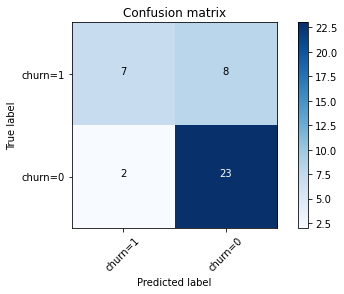

In [69]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [70]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.78      0.47      0.58        15

    accuracy                           0.75        40
   macro avg       0.76      0.69      0.70        40
weighted avg       0.76      0.75      0.73        40



In [71]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5919523592361466